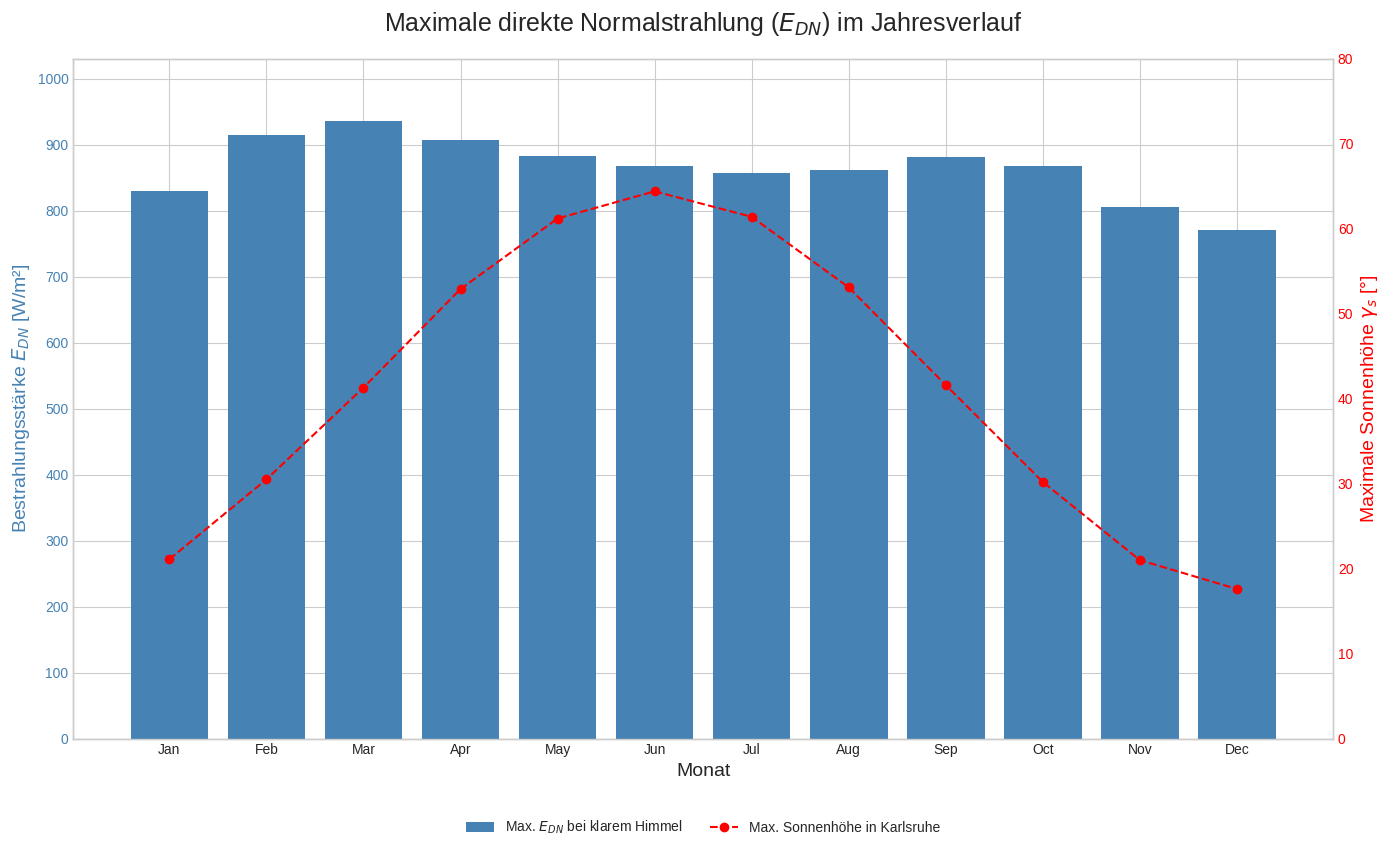

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND PARAMETER DEFINIEREN
# =============================================================================

# Lade die JSON-Daten aus einer Datei
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = list(solar_data.keys())

# Reale maximale Sonnenhöhen für Karlsruhe
gamma_s_monthly = {
    "Jan": 21.1, "Feb": 30.5, "Mar": 41.3, "Apr": 52.9, "May": 61.2, "Jun": 64.4,
    "Jul": 61.4, "Aug": 53.1, "Sep": 41.6, "Oct": 30.2, "Nov": 21.0, "Dec": 17.6
}
gamma_s_values = list(gamma_s_monthly.values())

# =============================================================================
# 2. E_DN FÜR JEDEN MONAT BERECHNEN
# =============================================================================

E_DN_results = []
for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    gamma_s = gamma_s_monthly[month]
    gamma_s_rad = np.deg2rad(gamma_s)
    
    if gamma_s > 0:
        E_DN = A / (np.exp(B / np.sin(gamma_s_rad)))
        E_DN_results.append(E_DN)
    else:
        E_DN_results.append(0)

# =============================================================================
# 3. ERGEBNISSE PLOTTEN
# =============================================================================

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- Linke Y-Achse: Balkendiagramm für E_DN ---
color_bar = '#4682B4'  # Steel Blue
ax1.set_xlabel('Monat', fontsize=14)
ax1.set_ylabel('Bestrahlungsstärke $E_{DN}$ [W/m²]', color=color_bar, fontsize=14)
ax1.bar(months, E_DN_results, color=color_bar, label='Max. $E_{DN}$ bei klarem Himmel',zorder=10)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_yticks(np.arange(0, 1001, 100)) 
ax1.set_ylim(0, max(E_DN_results) * 1.1)

# --- Rechte Y-Achse: Liniendiagramm für Sonnenhöhe ---
ax2 = ax1.twinx()
color_line = "#FF0000"  # Dark Orange
ax2.set_ylabel('Maximale Sonnenhöhe $\gamma_s$ [°]', color=color_line, fontsize=14)
ax2.plot(months, gamma_s_values, color=color_line, marker='o', linestyle='--', label='Max. Sonnenhöhe in Karlsruhe',)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.set_yticks(np.arange(0, 81, 10)) 
#ax2.set_ylim(0, max(E_DN_results) * 0.11)
ax2.grid(False)

# Titel und Layout
plt.title('Maximale direkte Normalstrahlung ($E_{DN}$) im Jahresverlauf', fontsize=18, pad=20)
fig.tight_layout()

# Legenden zusammenführen
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)
plt.show()


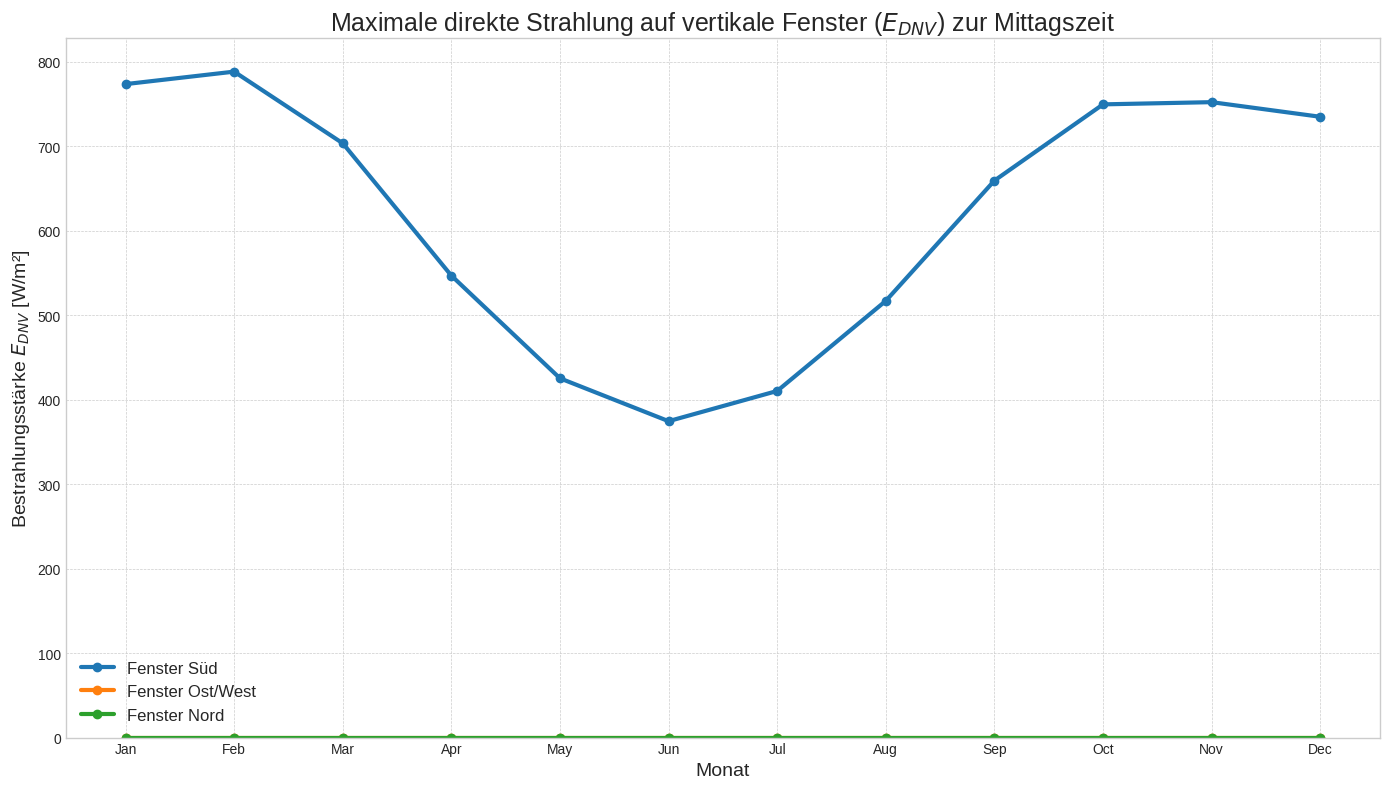

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATA LOADING AND PARAMETERS
# =============================================================================

# Load the JSON data from a file
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = list(solar_data.keys())

# Solar altitudes for Karlsruhe at solar noon for each month
gamma_s_monthly = {
    "Jan": 21.1, "Feb": 30.5, "Mar": 41.3, "Apr": 52.9, "May": 61.2, "Jun": 64.4,
    "Jul": 61.4, "Aug": 53.1, "Sep": 41.6, "Oct": 30.2, "Nov": 21.0, "Dec": 17.6
}

# Define window orientations (psi)
orientations = {
    'Süd': 0,
    'Ost/West': 90, # At solar noon, East and West perform identically
    'Nord': 180
}

# Azimuth at solar noon is always South (180°)
phi_noon = 180

# =============================================================================
# 2. CALCULATE E_DNV FOR EACH MONTH AND ORIENTATION
# =============================================================================

# Dictionary to store results for each orientation
results = {name: [] for name in orientations.keys()}

for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    gamma_s = gamma_s_monthly[month]
    gamma_s_rad = np.deg2rad(gamma_s)
    
    # Calculate E_DN for the month
    E_DN = A / (np.exp(B / np.sin(gamma_s_rad)))
    
    # Calculate E_DNV for each orientation
    for name, psi in orientations.items():
        gamma_deg = phi_noon - 180 - psi
        
        # Calculate cos(theta_v)
        cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
        
        # Calculate E_DNV, ensuring it's not negative
        if cos_theta_v > 0:
            E_DNV = E_DN * cos_theta_v
        else:
            E_DNV = 0
            
        results[name].append(E_DNV)

# =============================================================================
# 3. PLOT THE RESULTS
# =============================================================================

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

for name, values in results.items():
    plt.plot(months, values, marker='o', linestyle='-', lw=3, label=f'Fenster {name}')

# Chart titles and labels
plt.title('Maximale direkte Strahlung auf vertikale Fenster ($E_{DNV}$) zur Mittagszeit', fontsize=18)
plt.xlabel('Monat', fontsize=14)
plt.ylabel('Bestrahlungsstärke $E_{DNV}$ [W/m²]', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0)

plt.tight_layout()
plt.show()

/tmp/ipykernel_5062/292246493.py:68: UserWarning: Glyph 8347 (\N{LATIN SUBSCRIPT SMALL LETTER S}) missing from current font.
  plt.tight_layout()
/home/nicola/anaconda3/envs/meineumgebung/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8347 (\N{LATIN SUBSCRIPT SMALL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


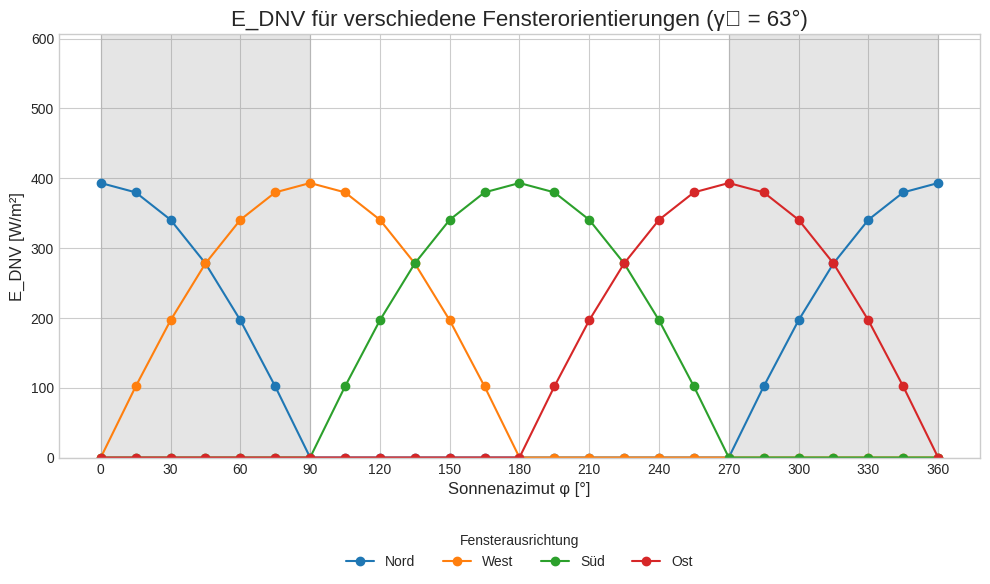

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#########################
# eigentlich müsste jeder azimut wert einen elevation(gamma_s) wert haben da sich die sonne auf einer kreis bahn bewegt 
# im süden müsste die strahlung höher sein als bei den anderen himmelsrichtungen
##################
# Eingestellte Werte
psi_values = [180, -90, 0, 90]          # Fensterazimute: Nord, West, Süd, Ost
gamma_s = 63                            # Sonnenhöhe in Grad (z. B. im Sommer)
phi_values = np.arange(0, 361, 15)      # Sonnenazimut von 0° bis 360° in 15°-Schritten
E_DN = 866                              # Direkte Normalstrahlung in W/m² Juni

# Zuordnung Fensterazimut → Himmelsrichtung
azimut_labels = {
    -90: "West",
     0: "Süd",
     90: "Ost",
    180: "Nord"
}

# Ergebnisliste
results = []

for psi in psi_values:
    for phi in phi_values:
        gamma = (phi - 180) - psi
        gamma_rad = np.deg2rad(gamma)
        gamma_s_rad = np.deg2rad(gamma_s)

        cos_theta_v = np.cos(gamma_s_rad) * np.cos(gamma_rad)
        cos_theta_v = max(0, cos_theta_v)
        E_DNV = E_DN * cos_theta_v

        results.append({
            "ψ": psi,
            "φ": phi,
            "cos(θ_v)": cos_theta_v,
            "E_DNV [W/m²]": E_DNV
        })

# DataFrame
df = pd.DataFrame(results)

# =============================================================================
# PLOT: E_DNV für verschiedene Fensterorientierungen bei γ_s = 64°
# =============================================================================

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 6))

# Plot für jede Fensterazimut-Richtung
for psi in psi_values:
    subset = df[df["ψ"] == psi]
    richtung = azimut_labels.get(psi, f"{psi}°")  # Himmelsrichtung statt Grad
    plt.plot(subset["φ"], subset["E_DNV [W/m²]"], marker='o', label=richtung)

# Achsenbeschriftung & Titel
plt.title(f"E_DNV für verschiedene Fensterorientierungen (γₛ = {gamma_s}°)", fontsize=16)
plt.xlabel("Sonnenazimut φ [°]", fontsize=12)
plt.ylabel("E_DNV [W/m²]", fontsize=12)
plt.xticks(np.arange(0, 361, 30))
plt.ylim(0, E_DN *0.7)
plt.legend(title="Fensterausrichtung", loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.axvspan(0, 90, color='gray', alpha=0.2, label='Keine Sonne')
plt.axvspan(270, 360, color='gray', alpha=0.2)
plt.grid(True)
plt.tight_layout()
plt.show()


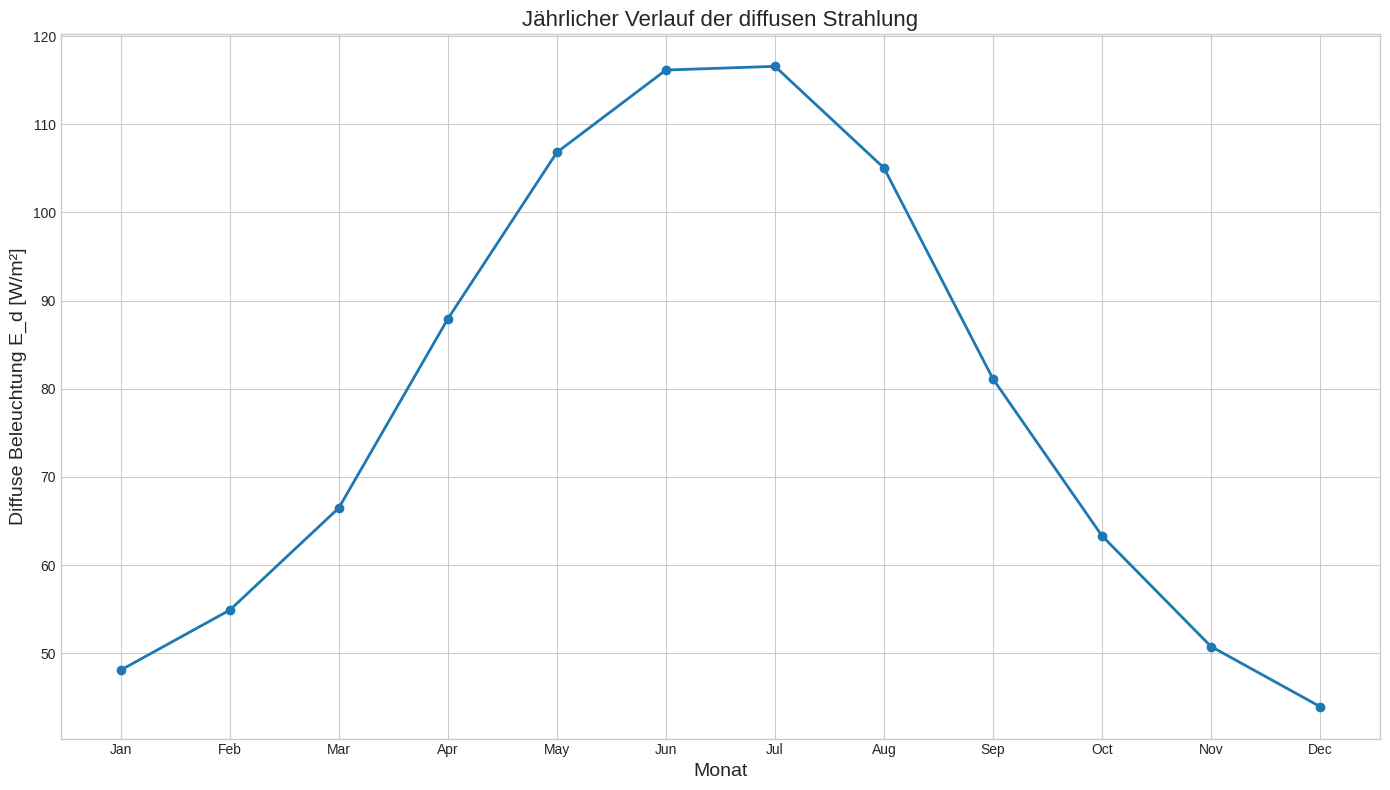

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Lade die JSON-Daten aus einer Datei
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = list(solar_data.keys())
E_DN_list = []
E_d_list = []

gamma_s_monthly = {
    "Jan": 21.1, "Feb": 30.5, "Mar": 41.3, "Apr": 52.9, "May": 61.2, "Jun": 64.4,
    "Jul": 61.4, "Aug": 53.1, "Sep": 41.6, "Oct": 30.2, "Nov": 21.0, "Dec": 17.6
}
gamma_s_values = list(gamma_s_monthly.values())
# Berechnungen für jeden Monat
for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    C = solar_data[month]["C"]
    gamma_s = gamma_s_monthly[month]

    gamma_s_rad = np.deg2rad(gamma_s)
    E_DN = A / np.exp(B / np.sin(gamma_s_rad))  # Direktstrahlung
    E_d = C * E_DN                              # Diffusstrahlung
 

    E_d_list.append(E_d)


# Plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))
plt.plot(months, E_d_list, marker='o', label='$E_d$ (diffus)', linewidth=2)

plt.title('Jährlicher Verlauf der diffusen Strahlung', fontsize=16)
plt.xlabel('Monat', fontsize=14)
plt.ylabel('Diffuse Beleuchtung E_d [W/m²]', fontsize=14)
#plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


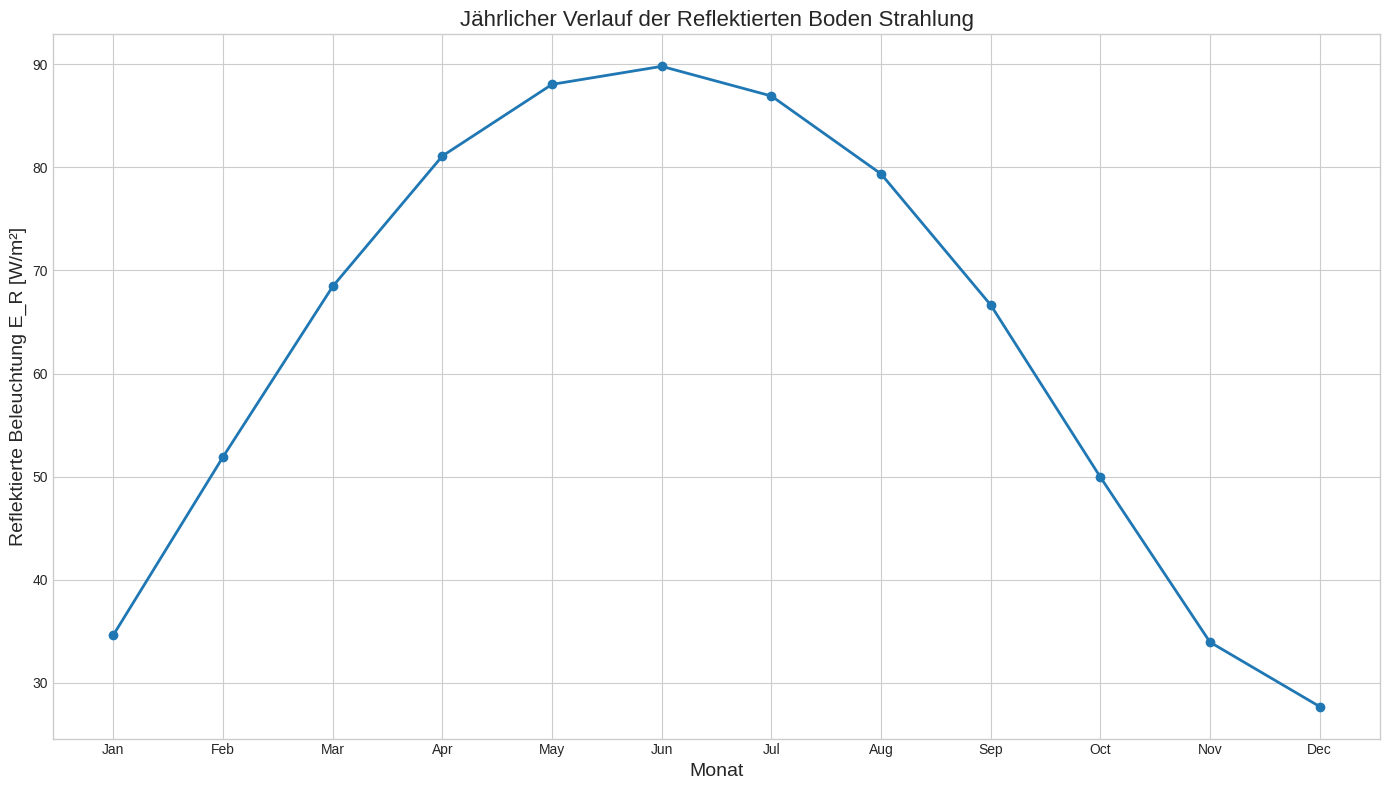

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Lade die JSON-Daten aus einer Datei
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = list(solar_data.keys())
E_DN_list = []
E_R_list = []
gamma_s_monthly = {
    "Jan": 21.1, "Feb": 30.5, "Mar": 41.3, "Apr": 52.9, "May": 61.2, "Jun": 64.4,
    "Jul": 61.4, "Aug": 53.1, "Sep": 41.6, "Oct": 30.2, "Nov": 21.0, "Dec": 17.6
}
gamma_s_values = list(gamma_s_monthly.values())
p_g=0.2

# Berechnungen für jeden Monat
for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    C = solar_data[month]["C"]
    gamma_s = gamma_s_monthly[month]

    gamma_s_rad = np.deg2rad(gamma_s)
    E_DN = A / np.exp(B / np.sin(gamma_s_rad))  
    E_R=E_DN *(C+np.sin(gamma_s_rad))*p_g*0.5

    E_R_list.append(E_R)

# Plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))
plt.plot(months, E_R_list, marker='o', label='$E_R$', linewidth=2)

plt.title('Jährlicher Verlauf der Reflektierten Boden Strahlung', fontsize=16)
plt.xlabel('Monat', fontsize=14)
plt.ylabel('Reflektierte Beleuchtung E_R [W/m²]', fontsize=14)
#plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


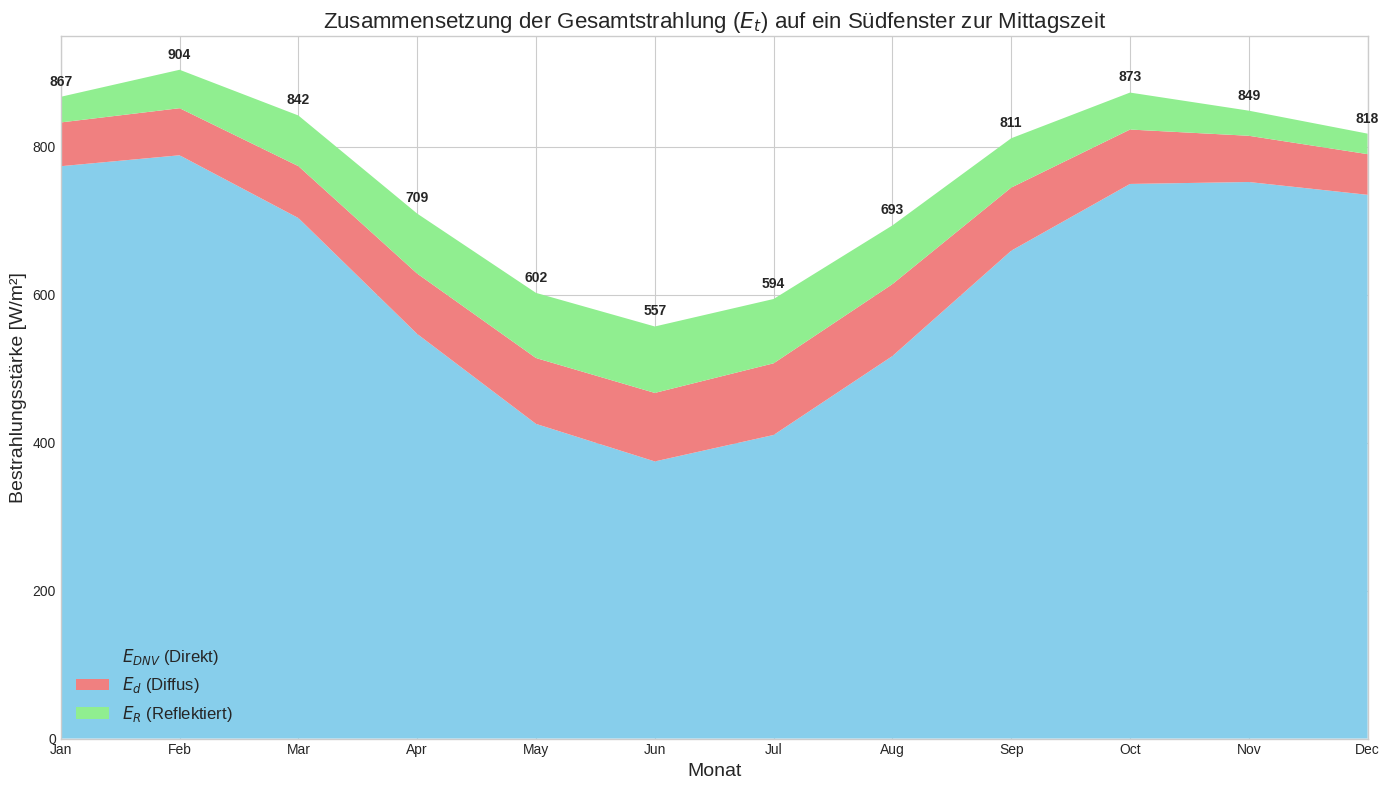

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND PARAMETER DEFINIEREN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

months = list(solar_data.keys())
p_g = 0.2 # Bodenreflexion

# Szenario: Südfenster zur Mittagszeit
psi_sued = 0
phi_noon = 180

gamma_s_monthly = {
    "Jan": 21.1, "Feb": 30.5, "Mar": 41.3, "Apr": 52.9, "May": 61.2, "Jun": 64.4,
    "Jul": 61.4, "Aug": 53.1, "Sep": 41.6, "Oct": 30.2, "Nov": 21.0, "Dec": 17.6
}

# Leere Listen für die Ergebnisse
E_DNV_list = []
E_d_list = []
E_R_list = []

# =============================================================================
# 2. BERECHNUNG ALLER DREI KOMPONENTEN FÜR JEDEN MONAT
# =============================================================================
for month in months:
    A = solar_data[month]["A"]
    B = solar_data[month]["B"]
    C = solar_data[month]["C"]
    gamma_s_deg = gamma_s_monthly[month]
    gamma_s_rad = np.deg2rad(gamma_s_deg)

    # Schritt 1: E_DN berechnen
    E_DN = A / np.exp(B / np.sin(gamma_s_rad))

    # Schritt 2: cos(theta_v) für Südfenster zur Mittagszeit berechnen
    gamma_deg = phi_noon - 180 - psi_sued
    gamma_rad = np.deg2rad(gamma_deg)
    cos_theta_v = np.cos(gamma_s_rad) * np.cos(gamma_rad)
    cos_theta_v = max(0, cos_theta_v) # Sicherstellen, dass der Wert nicht negativ ist

    # Schritt 3: Die drei Komponenten berechnen
    # Direkte Strahlung (E_DNV)
    E_DNV = E_DN * cos_theta_v
    
    # Diffuse Strahlung (E_d)
    Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2
    E_d = C * Y * E_DN
    
    # Reflektierte Strahlung (E_R)
    E_R = E_DN * (C + np.sin(gamma_s_rad)) * p_g * 0.5
    
    # Ergebnisse zu den Listen hinzufügen
    E_DNV_list.append(E_DNV)
    E_d_list.append(E_d)
    E_R_list.append(E_R)

# =============================================================================
# 3. LISTEN IN NUMPY-ARRAYS UMWANDELN UND ADDIEREN
# =============================================================================
E_DNV_array = np.array(E_DNV_list)
E_d_array = np.array(E_d_list)
E_R_array = np.array(E_R_list)

# Die eigentliche Addition
E_t_array = E_DNV_array + E_d_array + E_R_array

# =============================================================================
# 4. ERGEBNISSE ALS GESTAPELTES FLÄCHENDIAGRAMM PLOTTEN
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Die Stackplot-Funktion zeichnet die Komponenten übereinander
ax.stackplot(months, E_DNV_array, E_d_array, E_R_array, 
             labels=['$E_{DNV}$ (Direkt)', '$E_d$ (Diffus)', '$E_R$ (Reflektiert)'],
             colors=['skyblue', 'lightcoral', 'lightgreen'])

# Plot-Titel und Beschriftungen
ax.set_title('Zusammensetzung der Gesamtstrahlung ($E_t$) auf ein Südfenster zur Mittagszeit', fontsize=16)
ax.set_xlabel('Monat', fontsize=14)
ax.set_ylabel('Bestrahlungsstärke [W/m²]', fontsize=14)
ax.legend(loc='lower left', fontsize=12)
ax.grid(True)
ax.set_ylim(0)
ax.set_xlim(months[0], months[-1]) # Stellt sicher, dass der Plot die ganze Breite nutzt

# Gesamtwert E_t an den Spitzen annotieren
for i, month in enumerate(months):
    ax.text(month, E_t_array[i] + 15, f'{E_t_array[i]:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

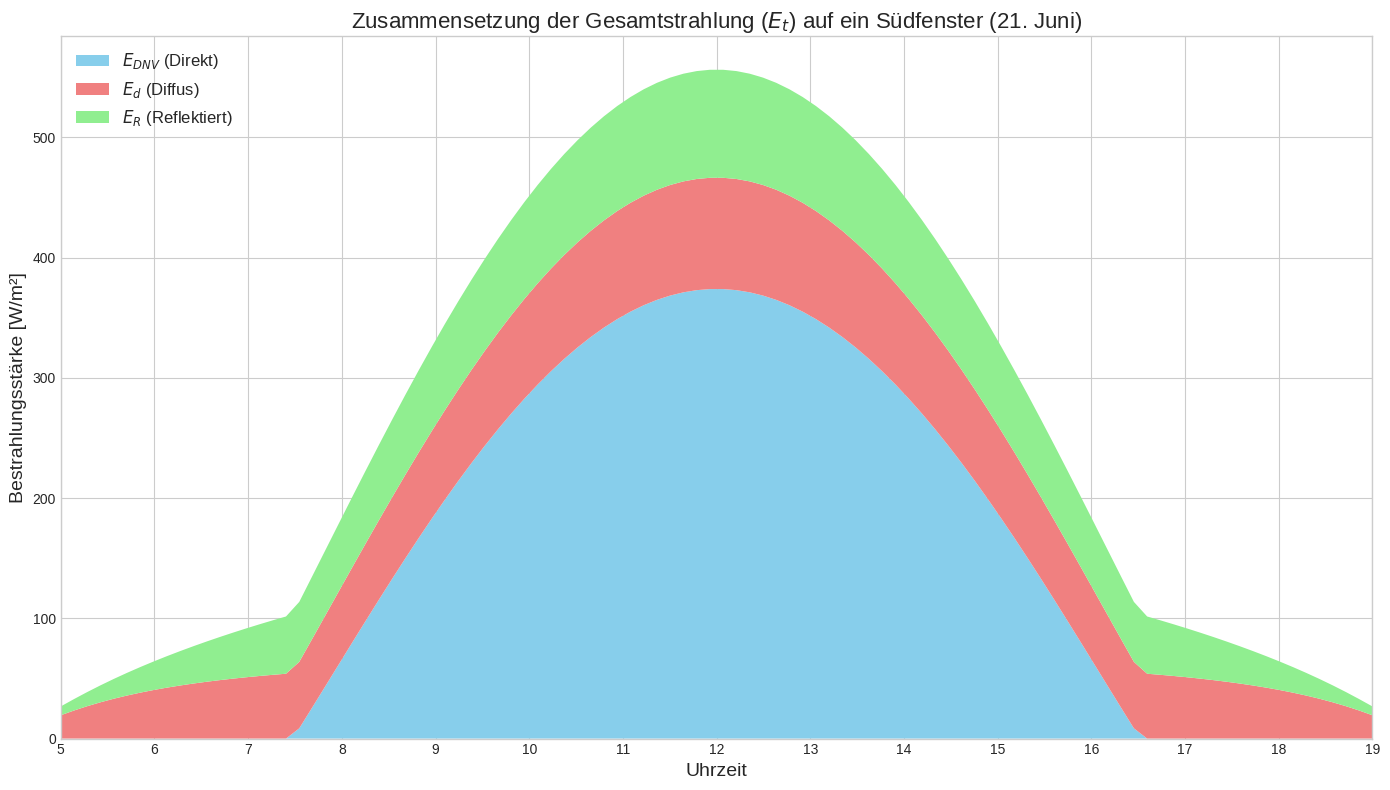

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND HELFERFUNKTIONEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

# Lade die ASHRAE-Parameter für Juni
juni_params = solar_data["Jun"]
A, B, C = juni_params['A'], juni_params['B'], juni_params['C']

p_g = 0.2  # Bodenreflexion

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    """Berechnet Sonnenhöhe (gamma_s) und Azimut (phi) für eine bestimmte Zeit."""
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. BERECHNUNG DER KOMPONENTEN ÜBER EINEN TAG
# =============================================================================
# Szenario: Südfenster am 21. Juni (Tag 172)
psi_sued = 0
day_of_year = 172
hours = np.linspace(5, 19, 100) # Von 5 Uhr morgens bis 19 Uhr abends

# Berechne Sonnenstand für den ganzen Tag
gamma_s_values, phi_values = get_sun_pos(day_of_year, hours)

# Leere Listen für die Ergebnisse
E_DNV_list, E_d_list, E_R_list = [], [], []

for gamma_s_deg, phi_deg in zip(gamma_s_values, phi_values):
    if gamma_s_deg > 0:
        gamma_s_rad = np.deg2rad(gamma_s_deg)
        
        E_DN = A / np.exp(B / np.sin(gamma_s_rad))
        
        gamma_deg = phi_deg - 180 - psi_sued
        cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
        cos_theta_v = max(0, cos_theta_v)

        E_DNV = E_DN * cos_theta_v
        Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2
        E_d = C * Y * E_DN
        E_R = E_DN * (C + np.sin(gamma_s_rad)) * p_g * 0.5
        
        E_DNV_list.append(E_DNV)
        E_d_list.append(E_d)
        E_R_list.append(E_R)
    else:
        E_DNV_list.append(0)
        E_d_list.append(0)
        E_R_list.append(0)

# =============================================================================
# 3. LISTEN IN NUMPY-ARRAYS UMWANDELN UND ADDIEREN
# =============================================================================
E_DNV_array = np.array(E_DNV_list)
E_d_array = np.array(E_d_list)
E_R_array = np.array(E_R_list)
E_t_array = E_DNV_array + E_d_array + E_R_array

# =============================================================================
# 4. ERGEBNISSE PLOTTEN
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

ax.stackplot(hours, E_DNV_array, E_d_array, E_R_array, 
             labels=['$E_{DNV}$ (Direkt)', '$E_d$ (Diffus)', '$E_R$ (Reflektiert)'],
             colors=['skyblue', 'lightcoral', 'lightgreen'])

# Plot-Titel und Beschriftungen
ax.set_title('Zusammensetzung der Gesamtstrahlung ($E_t$) auf ein Südfenster (21. Juni)', fontsize=16)
ax.set_xlabel('Uhrzeit', fontsize=14)
ax.set_ylabel('Bestrahlungsstärke [W/m²]', fontsize=14)
ax.legend(loc='upper left', fontsize=12)
ax.grid(True)
ax.set_ylim(0)
ax.set_xlim(hours[0], hours[-1])
ax.set_xticks(np.arange(5, 20, 1))

plt.tight_layout()
plt.show()

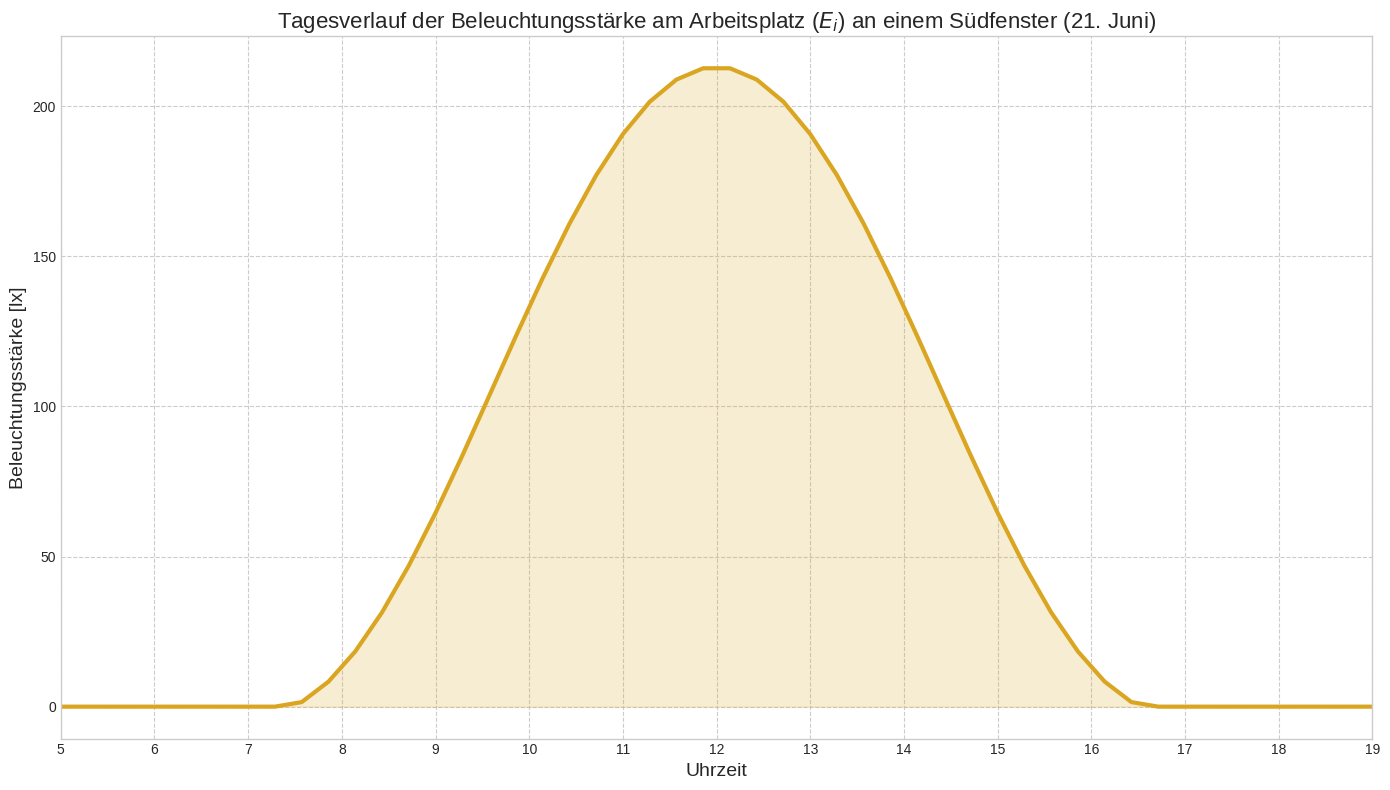

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND HELFERFUNKTIONEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

# Lade die ASHRAE-Parameter für Juni
juni_params = solar_data["Jun"]
A, B, C = juni_params['A'], juni_params['B'], juni_params['C']
p_g = 0.2  # Bodenreflexion

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. BERECHNUNG VON E_i ÜBER EINEN TAG
# =============================================================================
# Szenario: Südfenster am 21. Juni (Tag 172)
psi_sued = 0
day_of_year = 172
hours = np.linspace(5, 19, 50)

# Berechne Sonnenstand für den ganzen Tag
gamma_s_values, phi_values = get_sun_pos(day_of_year, hours)

# Parameter für die E_i-Formel
Ag = 3.0
tau = 0.8
M = 0.8
At = 28.7
R = 0.9

# Leere Liste für die E_i-Ergebnisse
E_i_list = []

for gamma_s_deg, phi_deg in zip(gamma_s_values, phi_values):
    if gamma_s_deg > 0:
        gamma_s_rad = np.deg2rad(gamma_s_deg)
        
        # Berechne E_t für diesen Zeitpunkt
        E_DN = A / np.exp(B / np.sin(gamma_s_rad))
        gamma_deg = phi_deg - 180 - psi_sued
        cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
        cos_theta_v = max(0, cos_theta_v)
        
        E_DNV = E_DN * cos_theta_v
        Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2
        E_d = C * Y * E_DN
        E_R = E_DN * (C + np.sin(gamma_s_rad)) * p_g * 0.5
        E_t = E_DNV + E_d + E_R
        
        # Berechne eta und dann E_i
        eta = 59.3 * gamma_s_deg**0.1252
        numerator = Ag * tau * cos_theta_v * M * E_t * eta
        denominator = At * (1 - R**2) * 0.396 * 100
        E_i = numerator / denominator
        
        E_i_list.append(E_i)
    else:
        E_i_list.append(0)

# =============================================================================
# 3. E_i PLOTTEN
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(hours, E_i_list, color='goldenrod', lw=3, label='Beleuchtungsstärke im Raum ($E_i$)')
ax.fill_between(hours, E_i_list, color='goldenrod', alpha=0.2)

# Plot-Titel und Beschriftungen
ax.set_title('Tagesverlauf der Beleuchtungsstärke am Arbeitsplatz ($E_i$) an einem Südfenster (21. Juni)', fontsize=16)
ax.set_xlabel('Uhrzeit', fontsize=14)
ax.set_ylabel('Beleuchtungsstärke [lx]', fontsize=14)
ax.grid(True, axis='both', linestyle='--')
ax.set_xlim(hours[0], hours[-1])
ax.set_xticks(np.arange(5, 20, 1))

plt.tight_layout()
plt.show()

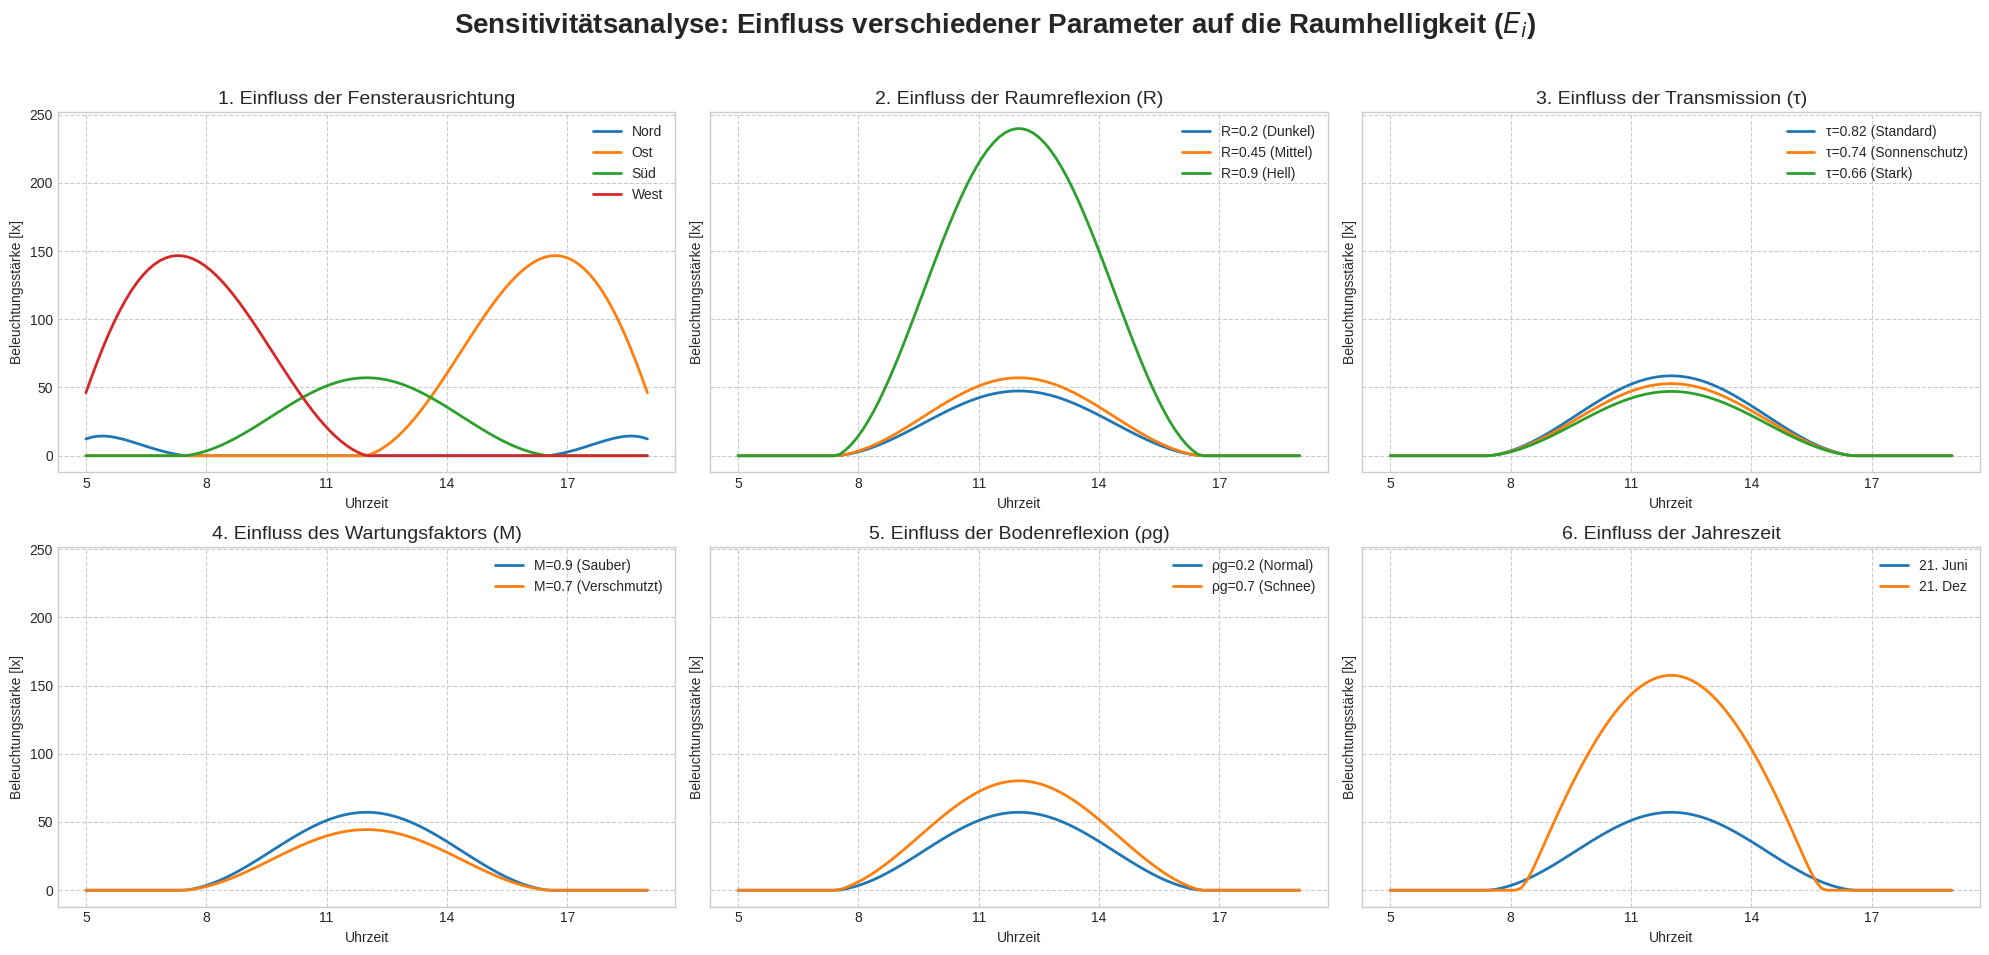

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND HELFERFUNKTIONEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

def get_month_params_safe(day_of_year):
    month_boundaries = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for i, boundary in enumerate(month_boundaries):
        if day_of_year <= boundary:
            return solar_data[list(solar_data.keys())[i]]
    return solar_data['Dec']

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. ZENTRALE BERECHNUNGSFUNKTION
# =============================================================================
def calculate_day_Ei(day_of_year, psi, R, tau, M, p_g, Ag=3.0, At=28.7):
    hours = np.linspace(5, 19, 100)
    gamma_s_values, phi_values = get_sun_pos(day_of_year, hours)
    params = get_month_params_safe(day_of_year)
    A, B, C = params['A'], params['B'], params['C']
    E_i_list = []
    
    for gamma_s_deg, phi_deg in zip(gamma_s_values, phi_values):
        if gamma_s_deg > 0:
            gamma_s_rad = np.deg2rad(gamma_s_deg)
            E_DN = A / np.exp(B / np.sin(gamma_s_rad))
            gamma_deg = phi_deg - 180 - psi
            cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
            cos_theta_v = max(0, cos_theta_v)
            
            E_DNV = E_DN * cos_theta_v
            Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2
            E_d = C * Y * E_DN
            E_R = E_DN * (C + np.sin(gamma_s_rad)) * p_g * 0.5
            E_t = E_DNV + E_d + E_R
            
            eta = 59.3 * gamma_s_deg**0.1252
            denominator = At * (1 - R**2 if R < 1 else 1e-6) * 0.396 * 100
            numerator = Ag * tau * cos_theta_v * M * E_t * eta
            E_i = numerator / denominator if denominator != 0 else 0
            E_i_list.append(E_i)
        else:
            E_i_list.append(0)
    return hours, E_i_list

# =============================================================================
# 3. PLOTS NEBENEINANDER ERSTELLEN
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
axes = axes.flatten()

# --- Plot 1: Einfluss der Fensterausrichtung (psi) ---
orientations = {'Nord': 180, 'Ost': 90, 'Süd': 0, 'West': -90}
for name, psi in orientations.items():
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=psi, R=0.45, tau=0.8, M=0.9, p_g=0.2)
    axes[0].plot(hours, Ei, label=name, lw=2)
axes[0].set_title('1. Einfluss der Fensterausrichtung', fontsize=14)
axes[0].legend()

# --- Plot 2: Einfluss der Raumreflexion (R) ---
for R_val, label in zip([0.2, 0.45, 0.9], ['Dunkel', 'Mittel', 'Hell']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=R_val, tau=0.8, M=0.9, p_g=0.2)
    axes[1].plot(hours, Ei, label=f'R={R_val} ({label})', lw=2)
axes[1].set_title('2. Einfluss der Raumreflexion (R)', fontsize=14)
axes[1].legend()

# --- Plot 3: Einfluss der Lichttransmission (tau) ---
for tau_val, label in zip([0.82, 0.74, 0.66,0.46], ['Standard', 'Sonnenschutz', 'Stark']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=tau_val, M=0.9, p_g=0.2)
    axes[2].plot(hours, Ei, label=f'τ={tau_val} ({label})', lw=2)
axes[2].set_title('3. Einfluss der Transmission (τ)', fontsize=14)
axes[2].legend()

# --- Plot 4: Einfluss des Wartungsfaktors (M) ---
for M_val, label in zip([0.9, 0.7], ['Sauber', 'Verschmutzt']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=M_val, p_g=0.2)
    axes[3].plot(hours, Ei, label=f'M={M_val} ({label})', lw=2)
axes[3].set_title('4. Einfluss des Wartungsfaktors (M)', fontsize=14)
axes[3].legend()

# --- Plot 5: Einfluss der Bodenreflexion (p_g) ---
for p_g_val, label in zip([0.2, 0.7], ['Normal', 'Schnee']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=0.9, p_g=p_g_val)
    axes[4].plot(hours, Ei, label=f'ρg={p_g_val} ({label})', lw=2)
axes[4].set_title('5. Einfluss der Bodenreflexion (ρg)', fontsize=14)
axes[4].legend()

# --- Plot 6: Einfluss der Jahreszeit ---
for day, label in zip([172, 355], ['21. Juni', '21. Dez']):
    hours, Ei = calculate_day_Ei(day_of_year=day, psi=0, R=0.45, tau=0.8, M=0.9, p_g=0.2)
    axes[5].plot(hours, Ei, label=label, lw=2)
axes[5].set_title('6. Einfluss der Jahreszeit', fontsize=14)
axes[5].legend()

# Allgemeine Einstellungen
for ax in axes:
    ax.set_ylabel('Beleuchtungsstärke [lx]', fontsize=10)
    ax.set_xlabel('Uhrzeit', fontsize=10)
    ax.set_xticks(np.arange(5, 20, 3))
    ax.grid(True, linestyle='--')

fig.suptitle('Sensitivitätsanalyse: Einfluss verschiedener Parameter auf die Raumhelligkeit ($E_i$)', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

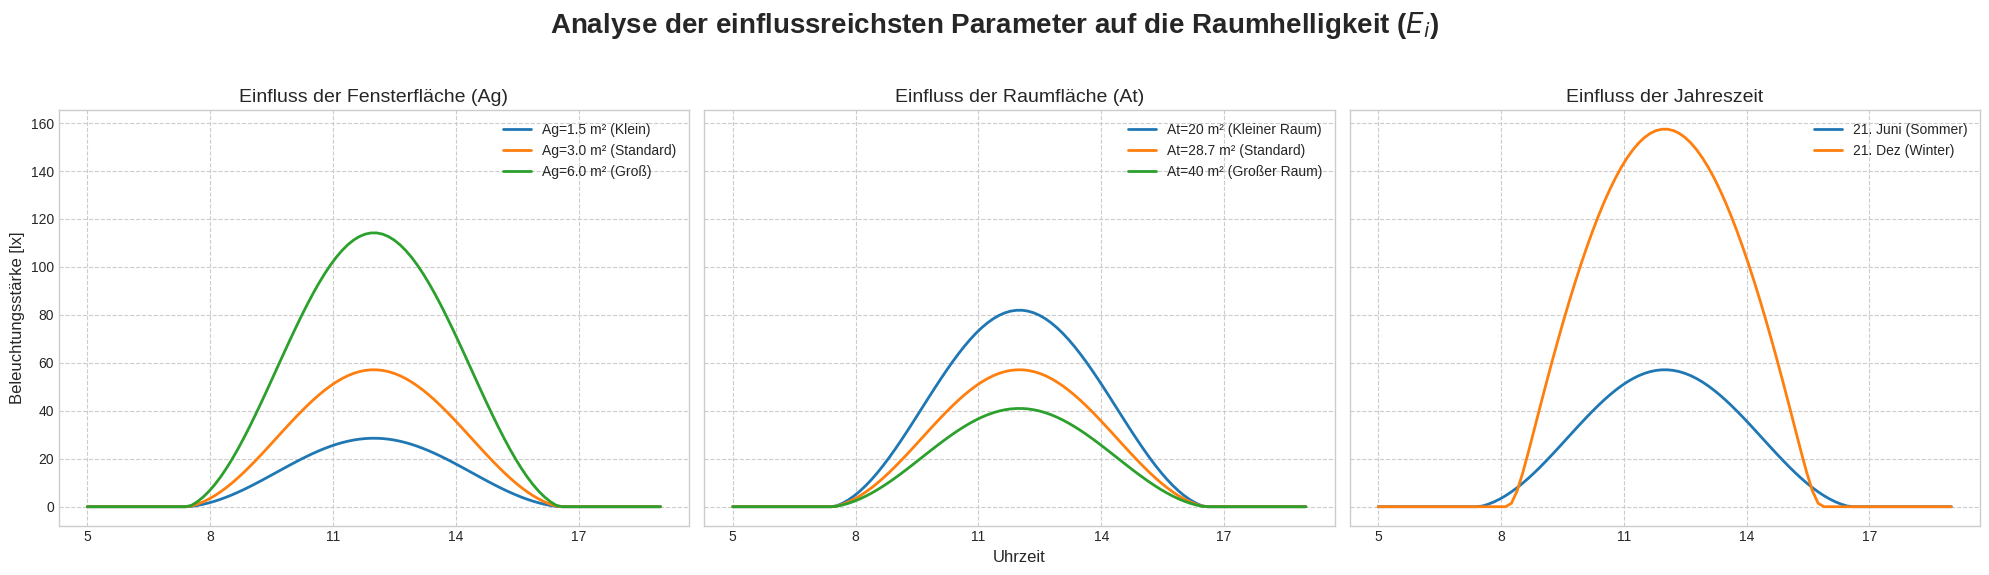

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND HELFERFUNKTIONEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

def get_month_params_safe(day_of_year):
    month_boundaries = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for i, boundary in enumerate(month_boundaries):
        if day_of_year <= boundary:
            return solar_data[list(solar_data.keys())[i]]
    return solar_data['Dec']

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. ZENTRALE BERECHNUNGSFUNKTION
# =============================================================================
def calculate_day_Ei(day_of_year, psi, R, tau, M, p_g, Ag, At):
    hours = np.linspace(5, 19, 100)
    gamma_s_values, phi_values = get_sun_pos(day_of_year, hours)
    params = get_month_params_safe(day_of_year)
    A, B, C = params['A'], params['B'], params['C']
    E_i_list = []
    
    for gamma_s_deg, phi_deg in zip(gamma_s_values, phi_values):
        if gamma_s_deg > 0:
            gamma_s_rad = np.deg2rad(gamma_s_deg)
            E_DN = A / np.exp(B / np.sin(gamma_s_rad))
            gamma_deg = phi_deg - 180 - psi
            cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
            cos_theta_v = max(0, cos_theta_v)
            
            E_DNV = E_DN * cos_theta_v
            Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2
            E_d = C * Y * E_DN
            E_R = E_DN * (C + np.sin(gamma_s_rad)) * p_g * 0.5
            E_t = E_DNV + E_d + E_R
            
            eta = 59.3 * gamma_s_deg**0.1252
            denominator = At * (1 - R**2 if R < 1 else 1e-6) * 0.396 * 100
            numerator = Ag * tau * cos_theta_v * M * E_t * eta
            E_i = numerator / denominator if denominator != 0 else 0
            E_i_list.append(E_i)
        else:
            E_i_list.append(0)
    return hours, E_i_list

# =============================================================================
# 3. PLOTS NEBENEINANDER ERSTELLEN
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
# Erstelle ein 1x3 Raster für 3 Plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
axes = axes.flatten()

# --- Plot 1: Einfluss der Fensterfläche (Ag) ---
for Ag_val, label in zip([1.5, 3.0, 6.0], ['Klein', 'Standard', 'Groß']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=0.9, p_g=0.2, Ag=Ag_val, At=28.7)
    axes[0].plot(hours, Ei, label=f'Ag={Ag_val} m² ({label})', lw=2)
axes[0].set_title('Einfluss der Fensterfläche (Ag)', fontsize=14)
axes[0].legend()
axes[0].set_ylabel('Beleuchtungsstärke [lx]', fontsize=12)


# --- Plot 2: Einfluss der Raumfläche (At) ---
for At_val, label in zip([20, 28.7, 40], ['Kleiner Raum', 'Standard', 'Großer Raum']):
    hours, Ei = calculate_day_Ei(day_of_year=172, psi=0, R=0.45, tau=0.8, M=0.9, p_g=0.2, Ag=3.0, At=At_val)
    axes[1].plot(hours, Ei, label=f'At={At_val} m² ({label})', lw=2)
axes[1].set_title('Einfluss der Raumfläche (At)', fontsize=14)
axes[1].legend()
axes[1].set_xlabel('Uhrzeit', fontsize=12)


# --- Plot 3: Einfluss der Jahreszeit ---
for day, label in zip([172, 355], ['21. Juni (Sommer)', '21. Dez (Winter)']):
    hours, Ei = calculate_day_Ei(day_of_year=day, psi=0, R=0.45, tau=0.8, M=0.9, p_g=0.2, Ag=3.0, At=28.7)
    axes[2].plot(hours, Ei, label=label, lw=2)
axes[2].set_title('Einfluss der Jahreszeit', fontsize=14)
axes[2].legend()


# Allgemeine Einstellungen
for ax in axes:
    ax.set_xticks(np.arange(5, 20, 3))
    ax.grid(True, linestyle='--')

fig.suptitle('Analyse der einflussreichsten Parameter auf die Raumhelligkeit ($E_i$)', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

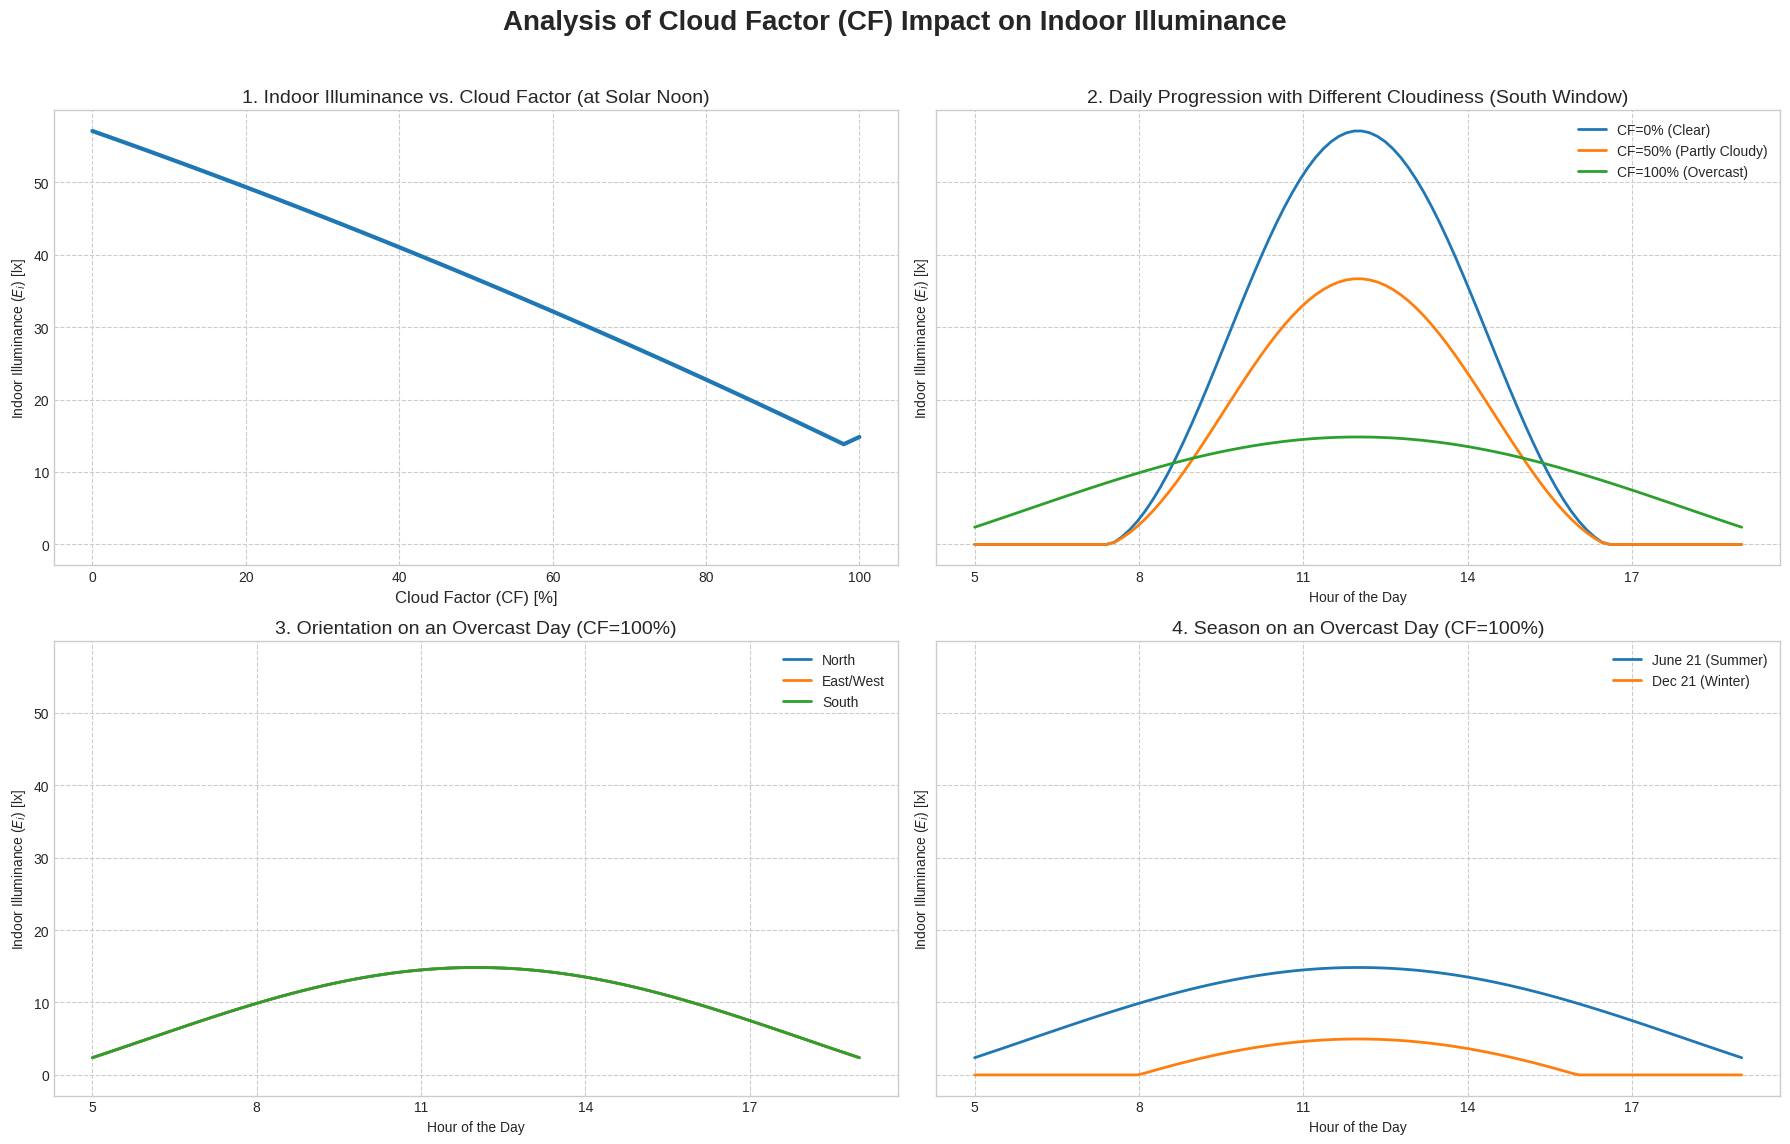

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATA LOADING AND HELPER FUNCTIONS
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

def get_month_params_safe(day_of_year):
    month_boundaries = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for i, boundary in enumerate(month_boundaries):
        if day_of_year <= boundary:
            return solar_data[list(solar_data.keys())[i]]
    return solar_data['Dec']

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. CALCULATION FUNCTION WITH CLOUD FACTOR (CF)
# =============================================================================
def calculate_day_Ei_with_CF(day_of_year, psi, R, tau, M, p_g, Ag, At, CF):
    hours = np.linspace(5, 19, 100)
    gamma_s_values, phi_values = get_sun_pos(day_of_year, hours)
    params = get_month_params_safe(day_of_year)
    A, B, C = params['A'], params['B'], params['C']
    E_i_list = []

    for gamma_s_deg, phi_deg in zip(gamma_s_values, phi_values):
        if gamma_s_deg > 0:
            gamma_s_rad = np.deg2rad(gamma_s_deg)
            E_DN_clear = A / np.exp(B / np.sin(gamma_s_rad))
            
            gamma_deg = phi_deg - 180 - psi
            cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma_deg))
            cos_theta_v = max(0, cos_theta_v)
            E_DNV = E_DN_clear * cos_theta_v * (1 - CF / 100)

            Y = 0.55 + 0.437 * cos_theta_v + 0.313 * cos_theta_v**2
            E_d_clear = C * Y * E_DN_clear
            E_d_h_overcast = 150 * np.sin(gamma_s_rad)
            E_d_overcast = E_d_h_overcast * 0.7
            E_d = E_d_clear * (1 - CF / 100) + E_d_overcast * (CF / 100)
            
            E_R = (E_DN_clear * (C + np.sin(gamma_s_rad)) * (1 - CF/100) + E_d_h_overcast * (CF/100)) * p_g * 0.5
            E_t = E_DNV + E_d + E_R
            
            eta = 115 * (CF / 100) + (59.3 * gamma_s_deg**0.1252) * (1 - CF / 100)

            denominator = At * (1 - R**2 if R < 1 else 1e-6) * 0.396 * 100
            
            if CF == 100:
                numerator = Ag * tau * 0.5 * M * E_t * eta
            else:
                numerator = Ag * tau * cos_theta_v * M * E_t * eta

            E_i = numerator / denominator if denominator != 0 else 0
            E_i_list.append(E_i)
        else:
            E_i_list.append(0)
    return hours, E_i_list

# =============================================================================
# 3. PLOTS FOR CF ANALYSIS
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)
axes = axes.flatten()

# **HERE IS THE FIX**: 'day_of_year' and 'psi' are removed from the base dictionary
base_params = {'R': 0.45, 'tau': 0.8, 'M': 0.9, 'p_g': 0.2, 'Ag': 3.0, 'At': 28.7}

# --- Plot 1: Clear to Overcast Transition ---
cf_values = np.linspace(0, 100, 50)
hours_for_noon, _ = calculate_day_Ei_with_CF(**base_params, day_of_year=172, psi=0, CF=0)
noon_index = np.argmin(np.abs(hours_for_noon - 12.0))
Ei_at_noon = []
for cf in cf_values:
    _, Ei = calculate_day_Ei_with_CF(**base_params, day_of_year=172, psi=0, CF=cf)
    Ei_at_noon.append(Ei[noon_index])
axes[0].plot(cf_values, Ei_at_noon, lw=3)
axes[0].set_title('1. Indoor Illuminance vs. Cloud Factor (at Solar Noon)', fontsize=14)
axes[0].set_xlabel('Cloud Factor (CF) [%]', fontsize=12)

# --- Plot 2: Daily Progression with Different Cloudiness ---
for cf, label in zip([0, 50, 100], ['Clear', 'Partly Cloudy', 'Overcast']):
    hours, Ei = calculate_day_Ei_with_CF(**base_params, day_of_year=172, psi=0, CF=cf)
    axes[1].plot(hours, Ei, label=f'CF={cf}% ({label})', lw=2)
axes[1].set_title('2. Daily Progression with Different Cloudiness (South Window)', fontsize=14)
axes[1].legend()

# --- Plot 3: Orientation on an Overcast Day (CF=100) ---
orientations = {'North': 180, 'East/West': 90, 'South': 0}
for name, psi in orientations.items():
    hours, Ei = calculate_day_Ei_with_CF(**base_params, day_of_year=172, psi=psi, CF=100)
    axes[2].plot(hours, Ei, label=name, lw=2)
axes[2].set_title('3. Orientation on an Overcast Day (CF=100%)', fontsize=14)
axes[2].legend()

# --- Plot 4: Season on an Overcast Day (CF=100) ---
for day, label in zip([172, 355], ['June 21 (Summer)', 'Dec 21 (Winter)']):
    hours, Ei = calculate_day_Ei_with_CF(**base_params, day_of_year=day, psi=0, CF=100)
    axes[3].plot(hours, Ei, label=label, lw=2)
axes[3].set_title('4. Season on an Overcast Day (CF=100%)', fontsize=14)
axes[3].legend()

# General Settings
for ax in axes:
    ax.set_ylabel('Indoor Illuminance ($E_i$) [lx]', fontsize=10)
    ax.grid(True, linestyle='--')
    if ax != axes[0]:
        ax.set_xlabel('Hour of the Day', fontsize=10)
        ax.set_xticks(np.arange(5, 20, 3))

fig.suptitle('Analysis of Cloud Factor (CF) Impact on Indoor Illuminance', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

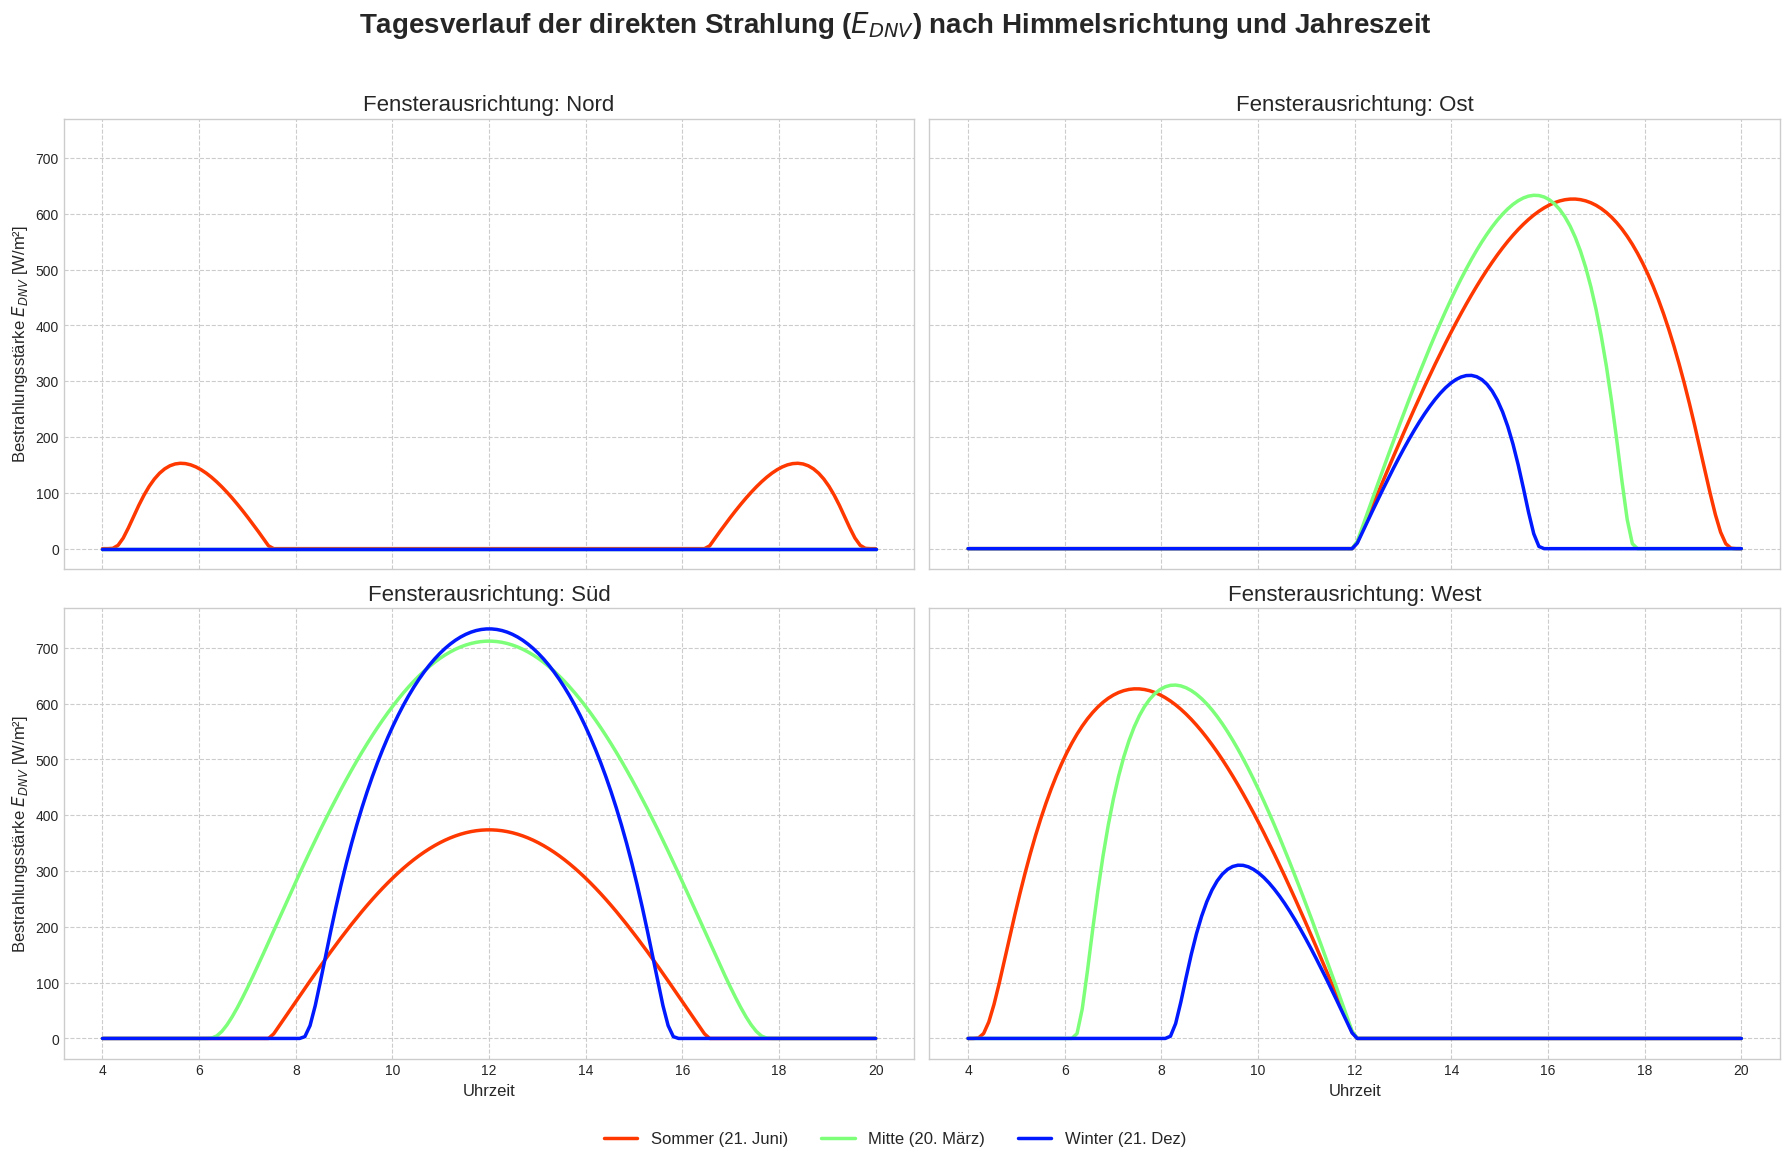

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATA LOADING AND HELPER FUNCTIONS
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

ashrae_params_list = [solar_data[m] for m in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]]

def get_month_params_safe(day_of_year):
    month_boundaries = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for i, boundary in enumerate(month_boundaries):
        if day_of_year <= boundary:
            return ashrae_params_list[i]
    return ashrae_params_list[-1]

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. CALCULATION OF DATA FOR PLOTS
# =============================================================================
psi_values = {'Nord': 180, 'Ost': 90, 'Süd': 0, 'West': -90}
days_to_plot = {'Sommer (21. Juni)': 172, 'Mitte (20. März)': 79, 'Winter (21. Dez)': 355}
hours = np.linspace(4, 20, 150)

results = {}

for name, psi in psi_values.items():
    day_results = {}
    for day_label, day_num in days_to_plot.items():
        E_DNV_values = []
        params = get_month_params_safe(day_num)
        A, B = params['A'], params['B']
        gamma_s_arr, phi_arr = get_sun_pos(day_num, hours)
        
        for gamma_s, phi in zip(gamma_s_arr, phi_arr):
            if gamma_s > 0:
                gamma_s_rad = np.deg2rad(gamma_s)
                E_DN = A / np.exp(B / np.sin(gamma_s_rad))
                gamma = (phi - 180) - psi
                cos_theta_v = np.cos(gamma_s_rad) * np.cos(np.deg2rad(gamma))
                E_DNV = E_DN * cos_theta_v if cos_theta_v > 0 else 0
                E_DNV_values.append(E_DNV)
            else:
                E_DNV_values.append(0)
        day_results[day_label] = E_DNV_values
    results[name] = day_results

# =============================================================================
# 3. PLOT: 2x2 LINE PLOTS FOR EACH CARDINAL DIRECTION
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

# **HERE ARE THE CHANGES**: Define colors from the 'jet' colormap
jet = plt.get_cmap('jet', 256)
colors = [jet(0.85), jet(0.5), jet(0.15)] # Blue/Green, Yellow, Red

for i, name in enumerate(['Nord', 'Ost', 'Süd', 'West']):
    ax = axes[i]
    data_for_orientation = results[name]
    for j, (day_label, values) in enumerate(data_for_orientation.items()):
        ax.plot(hours, values, label=day_label, lw=2.5, color=colors[j])
    
    ax.set_title(f'Fensterausrichtung: {name}', fontsize=16)
    ax.grid(True, linestyle='--')
    
    if i >= 2:
        ax.set_xlabel('Uhrzeit', fontsize=12)
    if i % 2 == 0:
        ax.set_ylabel('Bestrahlungsstärke $E_{DNV}$ [W/m²]', fontsize=12)

fig.suptitle('Tagesverlauf der direkten Strahlung ($E_{DNV}$) nach Himmelsrichtung und Jahreszeit', fontsize=20, fontweight='bold')

# **HERE IS THE CHANGE**: Create a single, shared legend below the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.02), fontsize=12)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0.06, 1, 0.96])
plt.show()

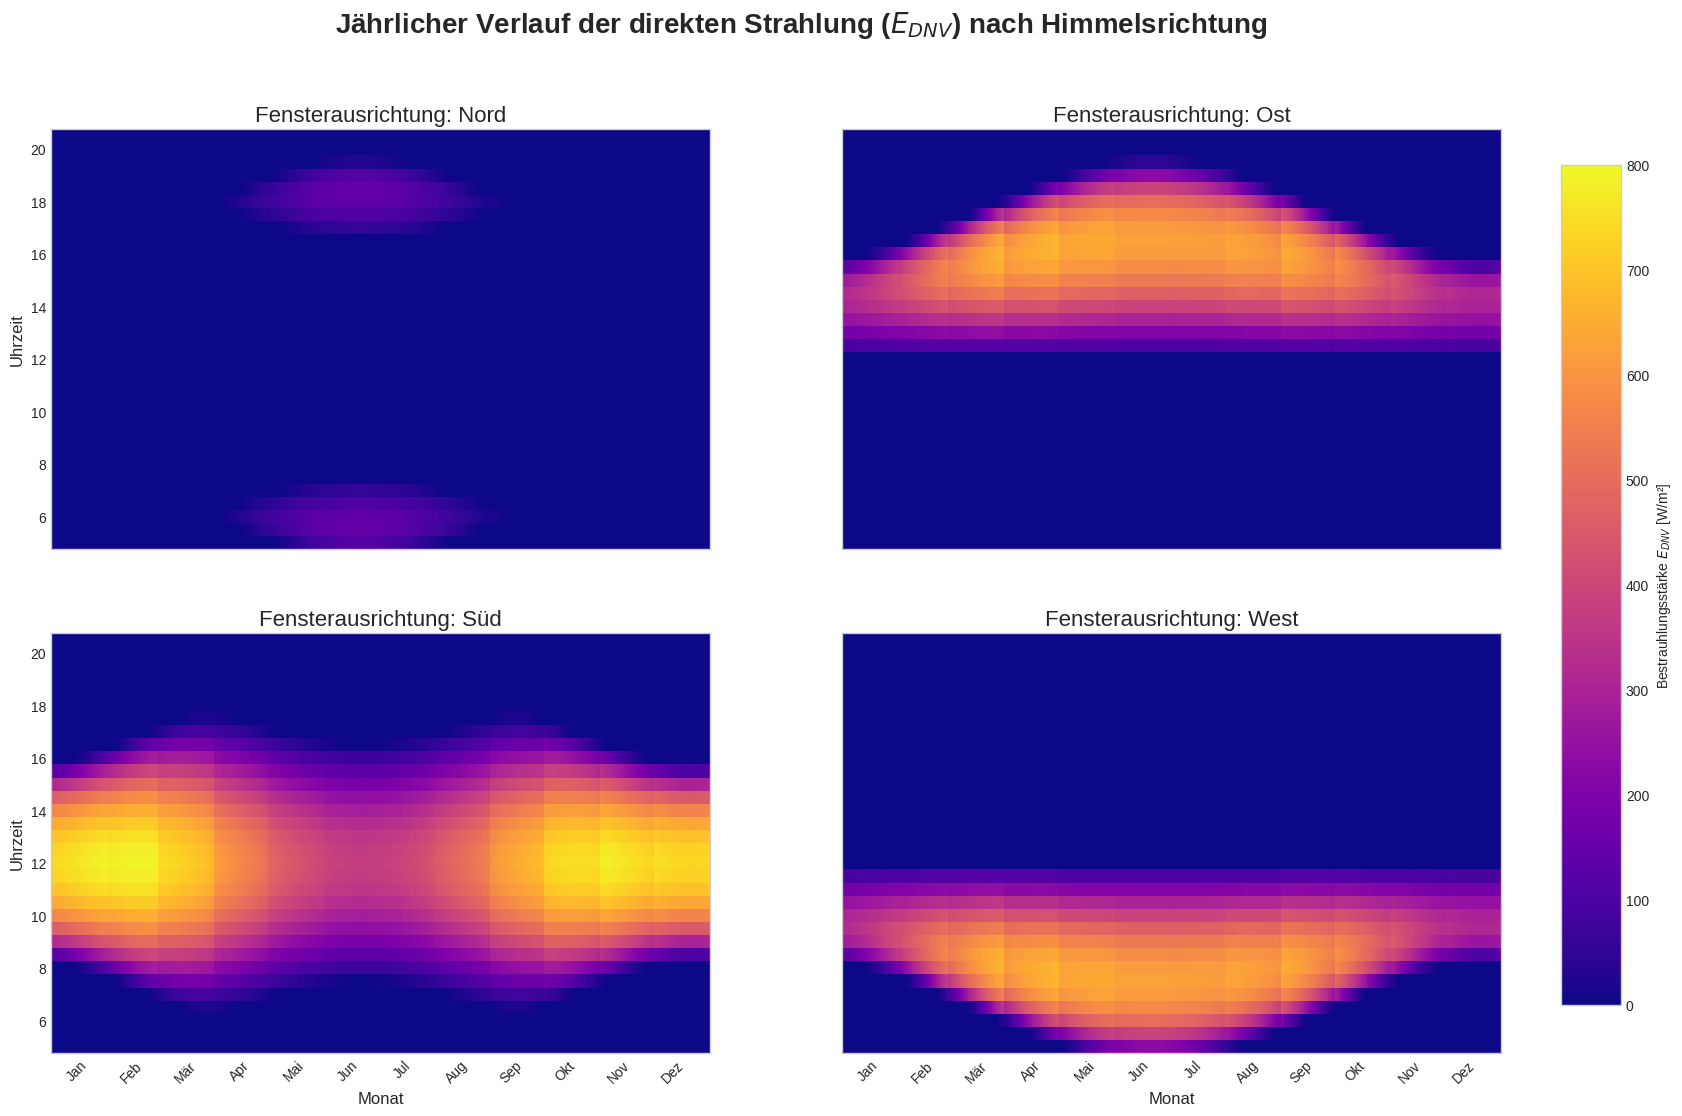

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import json

# =============================================================================
# 1. DATEN LADEN UND HELFERFUNKTIONEN
# =============================================================================
with open("solardaten.json", "r") as f:
    solar_data = json.load(f)

ashrae_params_list = [solar_data[m] for m in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]]

def get_month_params_safe(day_of_year):
    month_boundaries = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for i, boundary in enumerate(month_boundaries):
        if day_of_year <= boundary:
            return ashrae_params_list[i]
    return ashrae_params_list[-1]

def get_sun_pos(day_of_year, hour_of_day, lat=49.0):
    lat_rad = np.deg2rad(lat)
    B_angle = np.deg2rad(360/365 * (day_of_year - 81))
    solar_declination = np.deg2rad(-23.45 * np.cos(np.deg2rad(360/365 * (day_of_year + 10))))
    hour_angle = np.deg2rad(15 * (hour_of_day - 12))
    sin_gamma_s_rad = np.sin(lat_rad) * np.sin(solar_declination) + np.cos(lat_rad) * np.cos(solar_declination) * np.cos(hour_angle)
    gamma_s_rad = np.arcsin(np.clip(sin_gamma_s_rad, -1, 1))
    cos_azimuth_rad = (np.sin(solar_declination) - np.sin(lat_rad) * np.sin(gamma_s_rad)) / (np.cos(lat_rad) * np.cos(gamma_s_rad))
    azimuth_rad = np.arccos(np.clip(cos_azimuth_rad, -1, 1))
    azimuth_deg = np.rad2deg(azimuth_rad)
    if isinstance(hour_of_day, np.ndarray):
        azimuth_deg[hour_of_day > 12] = 360 - azimuth_deg[hour_of_day > 12]
    elif hour_of_day > 12:
        azimuth_deg = 360 - azimuth_deg
    return np.rad2deg(gamma_s_rad), azimuth_deg

# =============================================================================
# 2. BERECHNUNG DER JÄHRLICHEN DATEN FÜR JEDE AUSRICHTUNG
# =============================================================================
psi_values = {'Nord': 180, 'Ost': 90, 'Süd': 0, 'West': -90}
days = np.arange(1, 366)
hours = np.arange(5, 21, 0.5)

results = {}

for name, psi in psi_values.items():
    E_DNV_grid = np.zeros((len(hours), len(days)))
    for d_idx, day in enumerate(days):
        gamma_s_arr, phi_arr = get_sun_pos(day, hours)
        params = get_month_params_safe(day)
        A, B = params['A'], params['B']
        
        for h_idx, hour in enumerate(hours):
            gamma_s = gamma_s_arr[h_idx]
            phi = phi_arr[h_idx]
            
            if gamma_s > 0:
                gamma_s_rad = np.deg2rad(gamma_s)
                E_DN = A / np.exp(B / np.sin(gamma_s_rad))
                
                gamma = (phi - 180) - psi
                gamma_rad = np.deg2rad(gamma)
                
                cos_theta_v = np.cos(gamma_s_rad) * np.cos(gamma_rad)
                
                if cos_theta_v > 0:
                    E_DNV_grid[h_idx, d_idx] = E_DN * cos_theta_v
    results[name] = E_DNV_grid

# =============================================================================
# 3. PLOT: 2x2 Heatmap für jede Himmelsrichtung
# =============================================================================
# HIER DIE ÄNDERUNG: figsize etwas angepasst für besseres Verhältnis
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()
cmap = 'plasma'
vmax = 800

month_days_ticks = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

for i, name in enumerate(['Nord', 'Ost', 'Süd', 'West']):
    ax = axes[i]
    data = results[name]
    im = ax.pcolormesh(days, hours, data, cmap=cmap, shading='auto', vmax=vmax, vmin=0)
    ax.set_title(f'Fensterausrichtung: {name}', fontsize=16)
    
    if i >= 2:
        ax.set_xlabel('Monat', fontsize=12)
        ax.set_xticks(month_days_ticks)
        ax.set_xticklabels(month_names, rotation=45) # Texte gedreht für bessere Lesbarkeit
    
    if i % 2 == 0:
        ax.set_ylabel('Uhrzeit', fontsize=12)

# Haupttitel
fig.suptitle('Jährlicher Verlauf der direkten Strahlung ($E_{DNV}$) nach Himmelsrichtung', fontsize=20, fontweight='bold')

# HIER DIE ÄNDERUNG: Layout wird angepasst, um Platz für die Legende zu schaffen
# Wir passen den rechten Rand der Subplots an und schaffen Platz für die Colorbar
fig.subplots_adjust(right=0.85) 
# Wir erstellen eine neue Achse für die Colorbar in dem freigewordenen Platz
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7]) # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Bestrauhlungsstärke $E_{DNV}$ [W/m²]')


plt.show()